## Project 1 - Andrew, Aaron, Tim, and Michael

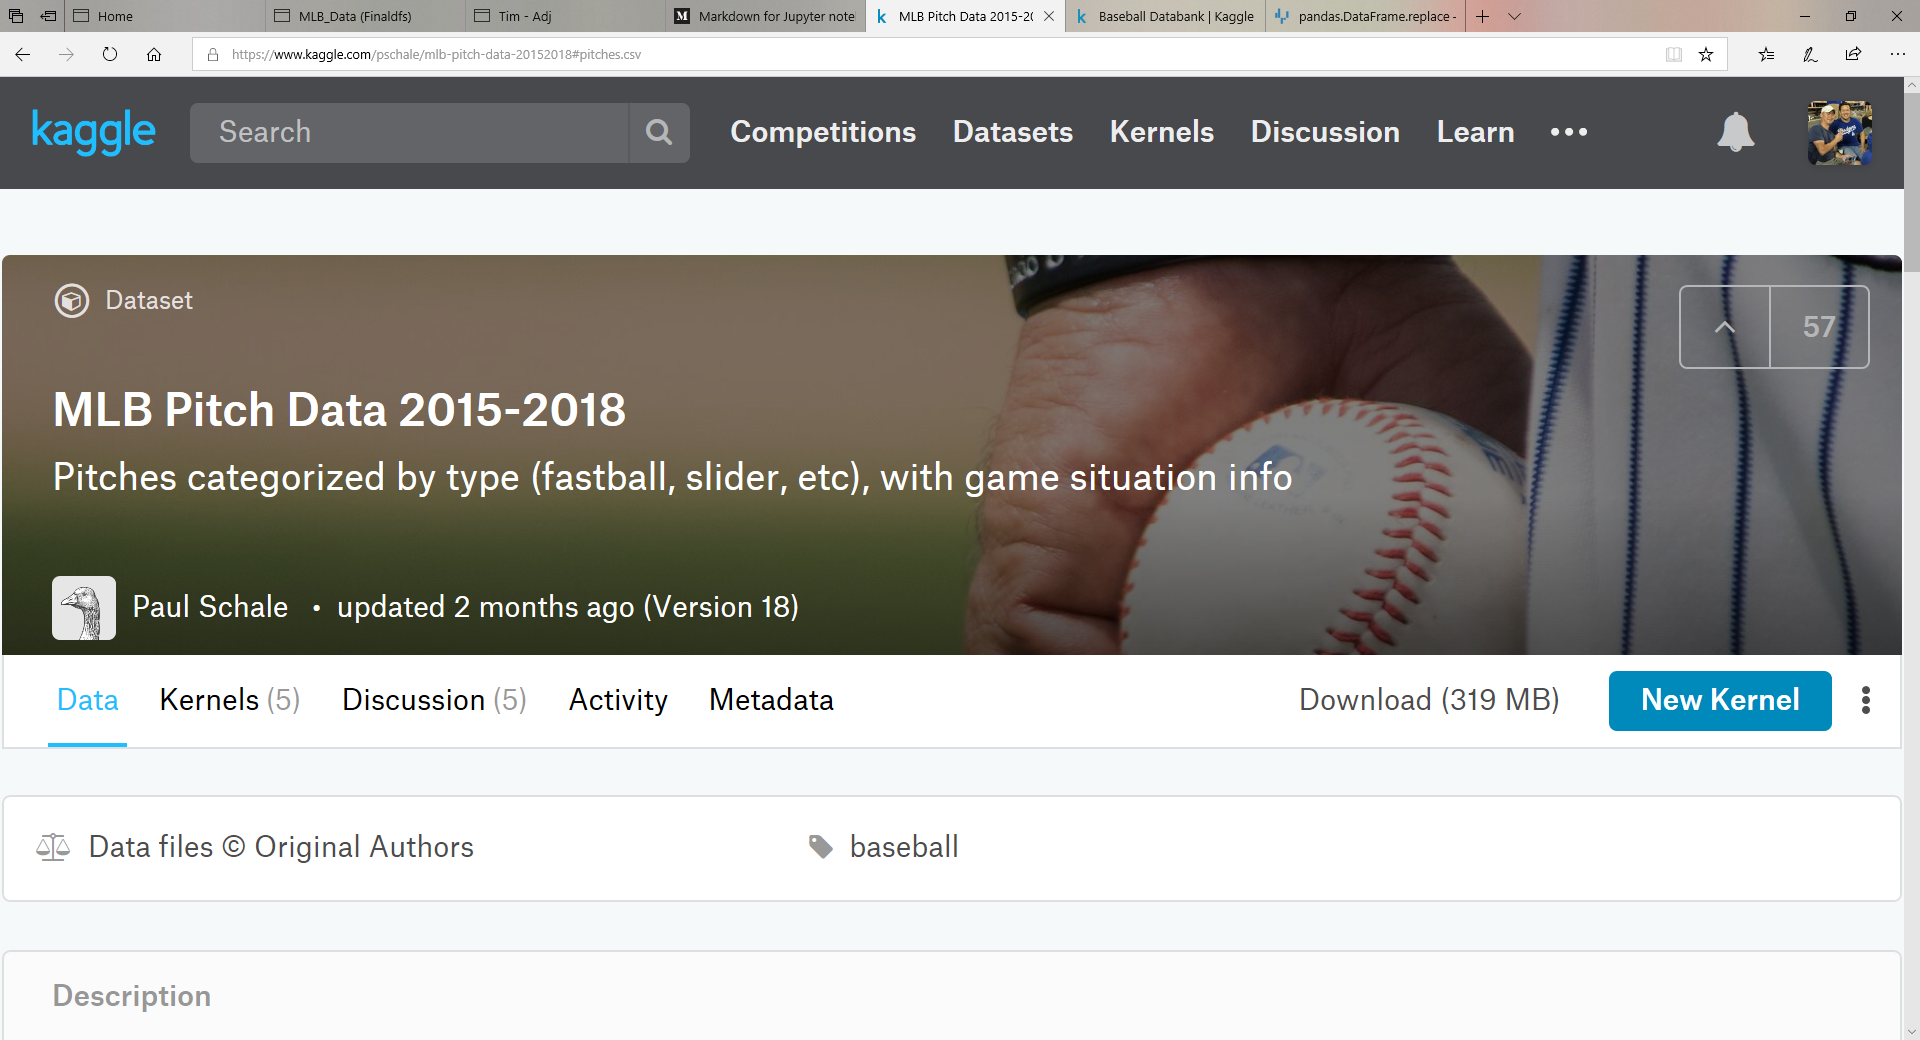

 **Dependencies**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

**Import CSV files**

In [2]:
players_csv = "player_names.csv"
players_df = pd.read_csv(players_csv, low_memory=False)
atbats_csv = "atbats.csv"
atbats_df = pd.read_csv(atbats_csv, low_memory=False)
games_csv = "games.csv"
games_df = pd.read_csv(games_csv, low_memory=False)

**Identify Column Headings**

In [3]:
players_df.columns

Index(['id', 'first_name', 'last_name'], dtype='object')

In [4]:
atbats_df.columns

Index(['ab_id', 'batter_id', 'event', 'g_id', 'inning', 'o', 'p_score',
       'p_throws', 'pitcher_id', 'stand', 'top'],
      dtype='object')

In [5]:
games_df.columns

Index(['attendance', 'away_final_score', 'away_team', 'date', 'elapsed_time',
       'g_id', 'home_final_score', 'home_team', 'start_time', 'umpire_1B',
       'umpire_2B', 'umpire_3B', 'umpire_HP', 'venue_name', 'weather', 'wind',
       'delay'],
      dtype='object')

**Cleaning DataFrames-**
    Drop, 
    Merge, 
    Rename,
    Replace,
    and Split Columns 

In [6]:
batter_df = players_df.rename({'id':'batter_id'}, axis =1)

In [7]:
pitcher_df = players_df.rename({'id':'pitcher_id'}, axis =1)

In [8]:
merge_df = pd.merge(atbats_df,games_df, on ='g_id', how='inner')

In [9]:
merge_df = pd.merge(merge_df,batter_df, on ='batter_id', how='inner')
merge_df = pd.merge(merge_df,pitcher_df, on ='pitcher_id', how ='inner')

In [10]:
merge_df = merge_df.rename(columns = {'first_name_x':'Batter_First','last_name_x':'Batter_Last','first_name_y':'Pitcher_First','last_name_y':'Pitcher_Last'})

In [11]:
merge_df.drop(['batter_id','g_id','pitcher_id','umpire_1B','umpire_2B','umpire_3B','umpire_HP'], axis=1, inplace=True)
merge_df.columns

Index(['ab_id', 'event', 'inning', 'o', 'p_score', 'p_throws', 'stand', 'top',
       'attendance', 'away_final_score', 'away_team', 'date', 'elapsed_time',
       'home_final_score', 'home_team', 'start_time', 'venue_name', 'weather',
       'wind', 'delay', 'Batter_First', 'Batter_Last', 'Pitcher_First',
       'Pitcher_Last'],
      dtype='object')

In [12]:
merge_df.head(2)

,ab_id,event,inning,o,p_score,p_throws,stand,top,attendance,away_final_score,...,home_team,start_time,venue_name,weather,wind,delay,Batter_First,Batter_Last,Pitcher_First,Pitcher_Last
0,2015000001,Groundout,1,1,0,L,L,True,35055,3,...,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter,Jon,Lester
1,2015000014,Single,2,2,0,L,L,True,35055,3,...,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter,Jon,Lester


In [13]:
pitches_csv = "pitches.csv"
pitches_df = pd.read_csv(pitches_csv, low_memory=False)
pd.set_option("display.max_columns", 50)

In [14]:
pitches_df.head()

,ab_id,ax,ay,az,b_count,b_score,break_angle,break_length,break_y,code,end_speed,nasty,on_1b,on_2b,on_3b,outs,pfx_x,pfx_z,pitch_num,pitch_type,px,pz,s_count,spin_dir,spin_rate,start_speed,sz_bot,sz_top,type,type_confidence,vx0,vy0,vz0,x,x0,y,y0,z0,zone
0,2015000001,7.665,34.685,-11.960,0,0,-25.0,3.2,23.7,C,84.1,55.0,False,False,False,0,4.16,10.93,1,FF,0.416,2.963,0,159.235,2305.052,92.9,1.72,3.56,S,2.0,-6.409,-136.065,-3.995,101.140000,2.280,158.780000,50.0,5.302,3.0
1,2015000001,12.043,34.225,-10.085,0,0,-40.7,3.4,23.7,S,84.1,31.0,False,False,False,0,6.57,12.00,2,FF,-0.191,2.347,1,151.402,2689.935,92.8,1.72,3.56,S,2.0,-8.411,-135.690,-5.980,124.280000,2.119,175.410000,50.0,5.307,5.0
2,2015000001,14.368,35.276,-11.560,0,0,-43.7,3.7,23.7,F,85.2,49.0,False,False,False,0,7.61,10.88,3,FF,-0.518,3.284,2,145.125,2647.972,94.1,1.72,3.56,S,2.0,-9.802,-137.668,-3.337,136.740000,2.127,150.110000,50.0,5.313,1.0
3,2015000001,2.104,28.354,-20.540,0,0,-1.3,5.0,23.8,B,84.0,41.0,False,False,False,0,1.17,6.45,4,FF,-0.641,1.221,2,169.751,1289.590,91.0,1.74,3.35,B,2.0,-8.071,-133.005,-6.567,109.685636,2.279,187.463482,50.0,5.210,13.0
4,2015000001,-10.280,21.774,-34.111,1,0,18.4,12.0,23.8,B,69.6,18.0,False,False,False,0,-8.43,-1.65,5,CU,-1.821,2.083,2,280.671,1374.569,75.4,1.72,3.56,B,2.0,-6.309,-110.409,0.325,146.527525,2.179,177.242829,50.0,5.557,13.0


In [15]:
file_df = pd.merge(pitches_df, merge_df, on = "ab_id", how = "inner")

In [16]:
file_df.head(2)

,ab_id,ax,ay,az,b_count,b_score,break_angle,break_length,break_y,code,end_speed,nasty,on_1b,on_2b,on_3b,outs,pfx_x,pfx_z,pitch_num,pitch_type,px,pz,s_count,spin_dir,spin_rate,...,z0,zone,event,inning,o,p_score,p_throws,stand,top,attendance,away_final_score,away_team,date,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay,Batter_First,Batter_Last,Pitcher_First,Pitcher_Last
0,2015000001,7.665,34.685,-11.960,0,0,-25.0,3.2,23.7,C,84.1,55.0,False,False,False,0,4.16,10.93,1,FF,0.416,2.963,0,159.235,2305.052,...,5.302,3.0,Groundout,1,1,0,L,L,True,35055,3,sln,2015-04-05,184,0,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter,Jon,Lester
1,2015000001,12.043,34.225,-10.085,0,0,-40.7,3.4,23.7,S,84.1,31.0,False,False,False,0,6.57,12.00,2,FF,-0.191,2.347,1,151.402,2689.935,...,5.307,5.0,Groundout,1,1,0,L,L,True,35055,3,sln,2015-04-05,184,0,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter,Jon,Lester


In [17]:
file_df.drop(['ax','ay','az','pfx_x','pfx_z','sz_bot','sz_top','vx0','vy0','vz0','x','x0','y','y0','z0'], axis=1, inplace=True)

In [18]:
file_df.head(2)

,ab_id,b_count,b_score,break_angle,break_length,break_y,code,end_speed,nasty,on_1b,on_2b,on_3b,outs,pitch_num,pitch_type,px,pz,s_count,spin_dir,spin_rate,start_speed,type,type_confidence,zone,event,inning,o,p_score,p_throws,stand,top,attendance,away_final_score,away_team,date,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay,Batter_First,Batter_Last,Pitcher_First,Pitcher_Last
0,2015000001,0,0,-25.0,3.2,23.7,C,84.1,55.0,False,False,False,0,1,FF,0.416,2.963,0,159.235,2305.052,92.9,S,2.0,3.0,Groundout,1,1,0,L,L,True,35055,3,sln,2015-04-05,184,0,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter,Jon,Lester
1,2015000001,0,0,-40.7,3.4,23.7,S,84.1,31.0,False,False,False,0,2,FF,-0.191,2.347,1,151.402,2689.935,92.8,S,2.0,5.0,Groundout,1,1,0,L,L,True,35055,3,sln,2015-04-05,184,0,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0,Matt,Carpenter,Jon,Lester


In [20]:
file_df.home_team.unique()

array(['chn', 'sea', 'mia', 'tba', 'phi', 'kca', 'hou', 'mil', 'det',
       'was', 'cin', 'lan', 'ari', 'oak', 'nya', 'sdn', 'col', 'cle',
       'tex', 'ana', 'cha', 'atl', 'bal', 'sfn', 'pit', 'min', 'sln',
       'nyn', 'tor', 'bos'], dtype=object)

In [21]:
file_df.shape

(2867162, 47)

In [22]:
file_final = file_df[['b_count','break_angle','code','end_speed','start_speed','nasty','pitch_type','type','event','p_throws','stand','away_team','date','home_team','start_time','venue_name','weather','wind','Batter_First','Batter_Last','Pitcher_First','Pitcher_Last']]

In [23]:
file_final.shape

(2867162, 22)

In [24]:
file_final = file_final.rename(columns={'b_count':'Balls','break_angle':'BreakAngle','code':'Result','start_speed':'Velocity','end_speed':'EndVelocity','nasty':'Nasty','pitch_type':'TypeofPitch','type':'Strike/Ball/X','event':'Result2','p_throws':'L/RPitcher','stand':'L/RBatter','away_team':'AwayTeam','date':'Date','home_team':'HomeTeam','start_time':'StartTime','venue_name':'Stadium','weather':'DescriptionofWeather','wind':'DescriptionofWind','Batter_First':'Batter1','Batter_Last':'Batter2','Pitcher_First':'Pitcher1','Pitcher_Last':'Pitcher2'})
file_final.replace({"Strike/Ball/X":{'S':'Strike','B':'Ball','X':'In Play'}}, inplace=True)

In [25]:
file_final.head()

,Balls,BreakAngle,Result,EndVelocity,Velocity,Nasty,TypeofPitch,Strike/Ball/X,Result2,L/RPitcher,L/RBatter,AwayTeam,Date,HomeTeam,StartTime,Stadium,DescriptionofWeather,DescriptionofWind,Batter1,Batter2,Pitcher1,Pitcher2
0,0,-25.0,C,84.1,92.9,55.0,FF,Strike,Groundout,L,L,sln,2015-04-05,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",Matt,Carpenter,Jon,Lester
1,0,-40.7,S,84.1,92.8,31.0,FF,Strike,Groundout,L,L,sln,2015-04-05,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",Matt,Carpenter,Jon,Lester
2,0,-43.7,F,85.2,94.1,49.0,FF,Strike,Groundout,L,L,sln,2015-04-05,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",Matt,Carpenter,Jon,Lester
3,0,-1.3,B,84.0,91.0,41.0,FF,Ball,Groundout,L,L,sln,2015-04-05,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",Matt,Carpenter,Jon,Lester
4,1,18.4,B,69.6,75.4,18.0,CU,Ball,Groundout,L,L,sln,2015-04-05,chn,7:17 PM,Wrigley Field,"44 degrees, clear","7 mph, In from CF",Matt,Carpenter,Jon,Lester


In [26]:
file_final.replace({"TypeofPitch":{'CH':' Changeup','CU':' Curveball','EP':' Eephus','FC':' Cutter','FF':' Fourseam Fastball','FO':' Pitchout','FS':' Splitter','FT':' Twoseam Fastball','IN':' Intentional ball','KC':' Knuckle curve','KN':' Knuckeball','PO':' Pitchout','SC':' Screwball','SI':' Sinker','SL':' Slider','UN':' Unknown'}}, inplace=True)

In [27]:
file_final["TypeofPitch"].unique()

array([' Fourseam Fastball', ' Curveball', ' Cutter', ' Sinker',
       ' Changeup', ' Twoseam Fastball', ' Intentional ball', ' Slider',
       nan, ' Knuckle curve', ' Eephus', ' Splitter', ' Pitchout',
       ' Knuckeball', ' Unknown', ' Screwball', 'FA', 'AB'], dtype=object)

In [28]:
file_final.replace({"Result":{'B':'Ball','*B':'Ball','S':'Strike','C':'Strike','F':'Strike','T':'Strike','L':'Strike','I':'Ball','W':'Strike','M':'Strike','P':'Ball','Q':'Strike','R':'Strike','X':'In Play','D':'In Play','E':'In Play','H':'HBP'}}, inplace=True)

In [29]:
file_final.replace({"HomeTeam":{'chn':'Chicago Cubs', 'sea':'Seattle Mariners', 'mia':'Miami Marlins', 'tba':'Tampa Bay Rays', 'phi':'Philadelphia Phillies', 'kca':'Kansas City Royals', 'hou':'Houston Astros', 'mil':'Milwaukee Brewers', 'det':'Detroit Tigers','was':'Washington Nationals', 'cin':'Cincinatti Reds', 'lan':'Los Angeles Dodgers', 'ari':'Arizona D-backs', 'oak':'Oakland Athletics', 'nya':'New York Yankees', 'sdn':'San Diego Padres', 'col':'Colorado Rockies', 'cle':'Cleveland Indians','tex':'Texas Rangers', 'ana':'Anaheim Angels', 'cha':'Chicago White Sox', 'atl':'Atlanta Braves', 'bal':'Baltimore Orioles', 'sfn':'San Francisco Giants', 'pit':'Pittsburgh Pirates', 'min':'Minnesota Twins', 'sln':'St Louis Cardinals', 'nyn':'New York Mets', 'tor':'Toronto Blue Jays', 'bos':'Boston Red Soxs'}},inplace=True)
file_final.replace({"AwayTeam":{'chn':'Chicago Cubs', 'sea':'Seattle Mariners', 'mia':'Miami Marlins', 'tba':'Tampa Bay Rays', 'phi':'Philadelphia Phillies', 'kca':'Kansas City Royals', 'hou':'Houston Astros', 'mil':'Milwaukee Brewers', 'det':'Detroit Tigers','was':'Washington Nationals', 'cin':'Cincinatti Reds', 'lan':'Los Angeles Dodgers', 'ari':'Arizona D-backs', 'oak':'Oakland Athletics', 'nya':'New York Yankees', 'sdn':'San Diego Padres', 'col':'Colorado Rockies', 'cle':'Cleveland Indians','tex':'Texas Rangers', 'ana':'Anaheim Angels', 'cha':'Chicago White Sox', 'atl':'Atlanta Braves', 'bal':'Baltimore Orioles', 'sfn':'San Francisco Giants', 'pit':'Pittsburgh Pirates', 'min':'Minnesota Twins', 'sln':'St Louis Cardinals', 'nyn':'New York Mets', 'tor':'Toronto Blue Jays', 'bos':'Boston Red Soxs'}},inplace=True)

In [30]:
file_final['AwayTeam'].unique()

array(['St Louis Cardinals', 'Anaheim Angels', 'Atlanta Braves',
       'Baltimore Orioles', 'Boston Red Soxs', 'Chicago White Sox',
       'Cleveland Indians', 'Colorado Rockies', 'Minnesota Twins',
       'New York Mets', 'Pittsburgh Pirates', 'San Diego Padres',
       'San Francisco Giants', 'Texas Rangers', 'Toronto Blue Jays',
       'Chicago Cubs', 'Detroit Tigers', 'Houston Astros',
       'Kansas City Royals', 'Los Angeles Dodgers', 'Seattle Mariners',
       'Tampa Bay Rays', 'Washington Nationals', 'Arizona D-backs',
       'Cincinatti Reds', 'Miami Marlins', 'Milwaukee Brewers',
       'New York Yankees', 'Oakland Athletics', 'Philadelphia Phillies'],
      dtype=object)

In [31]:
type(file_final["Result"][0])

str

In [32]:
new = file_final["DescriptionofWeather"].str.split(',',n=1,expand=True)
new1 = new[0].str.split(' ',n=1,expand=True)
file_final['Temp']=new1[0]
file_final['Conditions']=new[1]
news = file_final["DescriptionofWind"].str.split(',',n=1,expand=True)
news1 = news[0].str.split(' ',n=1,expand=True)
file_final['Wind_Speed(MPH)']=news1[0]
file_final.drop(['DescriptionofWeather','DescriptionofWind'], axis=1, inplace=True)
file_final.head()

,Balls,BreakAngle,Result,EndVelocity,Velocity,Nasty,TypeofPitch,Strike/Ball/X,Result2,L/RPitcher,L/RBatter,AwayTeam,Date,HomeTeam,StartTime,Stadium,Batter1,Batter2,Pitcher1,Pitcher2,Temp,Conditions,Wind_Speed(MPH)
0,0,-25.0,Strike,84.1,92.9,55.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
1,0,-40.7,Strike,84.1,92.8,31.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
2,0,-43.7,Strike,85.2,94.1,49.0,Fourseam Fastball,Strike,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
3,0,-1.3,Ball,84.0,91.0,41.0,Fourseam Fastball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7
4,1,18.4,Ball,69.6,75.4,18.0,Curveball,Ball,Groundout,L,L,St Louis Cardinals,2015-04-05,Chicago Cubs,7:17 PM,Wrigley Field,Matt,Carpenter,Jon,Lester,44,clear,7


**Print File to CSV**

In [33]:
file_final.to_csv('totest1.csv')